In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from gscripts.general import dataviz

In [17]:
wd = '/home/bay001/projects/maps_20160420/analysis/tests-8-23-2016'
allevents_raw = '204_01_RBFOX2.ip.all.feature.se.raw_density_matrix.csv'
# included_raw = '204_01_RBFOX2.ip.included.feature.se.raw_density_matrix.csv'
# excluded_raw = '204_01_RBFOX2.ip.excluded.feature.se.raw_density_matrix.csv'

In [18]:
alldf = pd.read_table(os.path.join(wd,allevents_raw),sep=',',index_col=0)
alldf.head()

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
chr10:104629562:104629602:+@chr10:104629841:104629968:+@chr10:104632205:104632355:+,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr10:21971154:21971186:+@chr10:21977420:21977467:+@chr10:22002701:22002879:+,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr11:111625223:111625293:-@chr11:111624167:111624301:-@chr11:111622883:111623056:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr11:62529267:62529376:+@chr11:62530014:62530214:+@chr11:62530339:62530498:+,0.000000,0.000000,0.000000,0.000000,0.0,0.233893,0.233893,0.233893,0.233893,0.233893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chr12:51450133:51450285:+@chr12:51451789:51451911:+@chr12:51453144:51454207:+,0.233893,0.233893,0.233893,0.233893,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.233893,0.233893,0.233893,0.233893,0.233893,0.233893,0.233893,0.233893,0.233893,0.233893


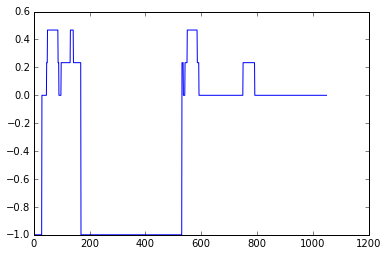

In [7]:
# should correspond to the area: 104629552-104632205: Shit it doesn't!!!
ax = plt.plot()#.replace(-1,np.nan))

In [19]:
b = {}
b['region1'], b['region2'], b['region3'], b['region4'] = np.array_split(alldf.ix['chr10:104629562:104629602:+@chr10:104629841:104629968:+@chr10:104632205:104632355:+'],4)

In [20]:
def four_frame(region1, region2, region3, region4, 
               title, output_file, color='red'):
    num_rows = 1
    num_cols = 4
    
        
    with dataviz.Figure(output_file, figsize=(num_cols * 2.5,num_rows * 2.5)) as fig:
            
        min_height = min(min(region1),min(region2),min(region3),min(region4))
        max_height = max(max(region1),max(region2),max(region3),max(region4))
            
        linewidth = 2.5
        ax = fig.add_subplot(1,4,1)
        ax.plot(region1, linewidth=linewidth, alpha=.7, color = color)
        # ax.plot(three_upstream_normed_nt, linewidth=linewidth, alpha=.7, color = 'blue')
        sns.despine(ax=ax)
        ax.set_ylim(min_height, max_height)
        # ax.set_xticklabels(np.arange(-exon_offset, intron_offset+1, 50))
        ax.set_ylabel("Mean Read Density")
            
        ax = fig.add_subplot(1,4,2)
        ax.plot(region2, linewidth=linewidth, alpha=.7, color = color)
        # ax.plot(five_skipped_normed_nt, linewidth=linewidth, alpha=.7, color = 'blue')
            
        sns.despine(ax=ax, left=True)
        ax.set_ylim(min_height, max_height)
        # ax.set_xticklabels(np.arange(-intron_offset, exon_offset+1, 50))
        ax.set_yticklabels([])
            
        ax = fig.add_subplot(1,4,3)
        ax.plot(region3, linewidth=linewidth, alpha=.7, color = color)
        # ax.plot(three_skipped_normed_nt, linewidth=linewidth, alpha=.7, color = 'blue')
            
        sns.despine(ax=ax, left=True)
        ax.set_ylim(min_height, max_height)
        # ax.set_xticklabels(np.arange(-exon_offset, intron_offset+1, 50))
        ax.set_yticklabels([])
            
        ax = fig.add_subplot(1,4,4)
        ax.plot(region4, linewidth=linewidth, alpha=.7, color = color)
        # ax.plot(five_downstream_normed_nt, linewidth=linewidth, alpha=.7, color = 'blue')
            
        sns.despine(ax=ax, left=True)
        ax.set_ylim(min_height, max_height)
        # ax.set_xticklabels(np.arange(-intron_offset, exon_offset+1, 50))
        ax.set_yticklabels([])
        plt.suptitle(title,y=1.03)


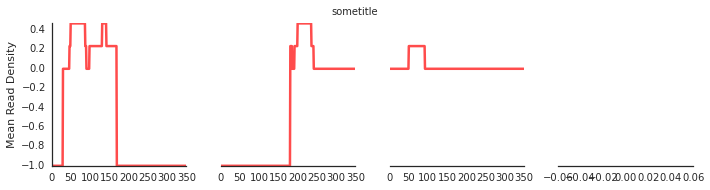

In [15]:
output = '/home/bay001/projects/maps_20160420/analysis/tests-8-23-2016/rbfox2.svg'
four_frame(b['region1'], b['region2'], b['region3'], b['region4'], 
               title='sometitle', output_file=output, color='red')

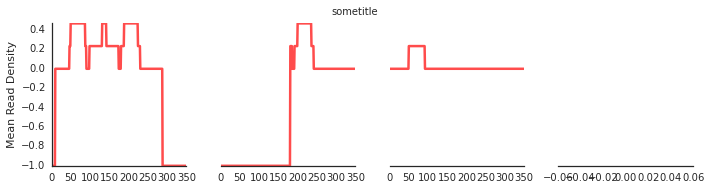

In [21]:
output = '/home/bay001/projects/maps_20160420/analysis/tests-8-23-2016/rbfox2.svg'
four_frame(b['region1'], b['region2'], b['region3'], b['region4'], 
               title='sometitle', output_file=output, color='red')

In [26]:
pd.Series([-1]*10)

0   -1
1   -1
2   -1
3   -1
4   -1
5   -1
6   -1
7   -1
8   -1
9   -1
dtype: int64